**Performing Optical Character Recognition (OCR) on Images**


In [ ]:
!pip3 install torch torchvision torchaudio
# قم بتثبيت بايتورش والمكتبات المرتبطة (تورش، تورش فيجن، تورش أوديو)

In [ ]:
!pip install easyocr
# قم بتثبيت مكتبة EasyOCR للتعرف البصري على الحروف

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.2 MB/s eta 0:00:00


In [ ]:
import easyocr #easyocr هي مكتبة بايثون للتعرف الضوئي على الحروف (OCR). OCR هو تقنية تُستخدم للتعرف على النص داخل الصور أو المستندات الممسوحة ضوئياً. easyocr تبسط عملية استخراج النص من الصور عن طريق توفير واجهة سهلة الاستخدام
import cv2 #OpenCV هي مكتبة مفتوحة المصدر لرؤية الحاسوب والتعلم الآلي. توفر مجموعة من الأدوات والوظائف لمعالجة الصور، ومهام رؤية الحاسوب، وتحليل الفيديو
from matplotlib import pyplot as plt #Matplotlib هي مكتبة بايثون شهيرة لرسم الرسوم البيانية، تستخدم لإنشاء رسوم بيانية ساكنة، تفاعلية، ومتحركة في بايثون. pyplot هو وحدة داخل Matplotlib توفر واجهة مشابهة للماتلاب لإنشاء الرسوم البيانية.
import numpy as np #باستيراد numpy as np، يمكنك أداء مجموعة متنوعة من العمليات الرياضية والمنطقية على المصفوفات ومعالجة البيانات العددية بكفاءة.

In [ ]:
IMAGE_PATH = '/content/لوحات الطريق.jpg'
# مسار الصورة التي سنستخدمها للتعرف على النص

In [ ]:
reader = easyocr.Reader(['en'])  # Initialize the OCR reader for English language
# Initialize the OCR reader for the Arabic language

reader = easyocr.Reader(['ar']) # قمنا بتهيئة قارئ التعرف الضوئي على الحروف للغة الإنجليزية و العربية

result = reader.readtext(IMAGE_PATH)
##result=النص الذي تم التعرف عليه وإحداثيات المربع المحيط به كما تم إرجاعها بواسطة مكتبة EasyOCR.

result  # Output the recognized text and its bounding box coordinates
#عندما تقوم بطباعة النتيجة، ستعرض أسطر النص المكتشفة مع إحداثيات المربع المحيط المقابلة لها

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[[[[535, 242], [998, 242], [998, 327], [535, 327]],
  'المدينة الصناعية',
  0.5309822882927262],
 [[[530, 315], [993, 315], [993, 375], [530, 375]],
  '٥ع8^ 8٥ح٥',
  0.04427617074740604],
 [[[506, 419], [774, 419], [774, 474], [506, 474]],
  '^، @^99٥',
  0.10859008373249568],
 [[[506, 494], [762, 494], [762, 546], [506, 546]],
  '^3  ^٥6',
  0.060277320669238604],
 [[[822, 473], [1037, 473], [1037, 560], [822, 560]],
  'الرياض',
  0.9973871754022179],
 [[[487, 618], [1030, 618], [1030, 696], [487, 696]],
  'طريق الملك عبدالله',
  0.7453985530963871],
 [[[516, 706], [988, 706], [988, 762], [516, 762]],
  ' #٥٧2٥٥ق^ ش',
  0.029768394601534208],
 [[[489, 819], [1021, 819], [1021, 906], [489, 906]],
  'طريق الملك سلمان',
  0.6811849478613712],
 [[[546, 904], [970, 904], [970, 958], [546, 958]],
  '.| ٥س٥$ ش',
  0.052029904604332766],
 [[[814.543977760618, 421.3863310579156],
   [1033.430335165943, 401.03518646087986],
   [1035.456022239382, 467.6136689420844],
   [815.569664834057, 487.96

**استخراج الإحداثيات والنص المعترف به من أول سطر نص تم التعرف عليه**

تحضير البيانات التي ستُستخدم في عمليات مثل رسم مربع الحدود حول النص وكتابة النص على الصورة. تُساعد في تخصيص المظهر والموقع للنص المعترف به في الصورة بناءً على البيانات التي تم استخراجها بواسطة EasyOCR.

In [ ]:
# استخراج الإحداثيات والنص المعترف به من أول سطر نص تم التعرف عليه
top_left = tuple(result[0][0][0])  # إحداثيات الزاوية العلوية اليسرى لصندوق الحدود

bottom_right = tuple(result[0][0][2])  # إحداثيات الزاوية السفلية اليمنى لصندوق الحدود

text = result[0][1]  # النص المعترف به من السطر الأول

font = cv2.FONT_HERSHEY_SIMPLEX  # نمط الخط المستخدم لكتابة النص على الصورة باستخدام OpenCV


Displaying Recognized Text and Bounding Box on the Image

cv2 هو اختصار لـ OpenCV، وهي مكتبة مفتوحة المصدر لرؤية الحاسوب ومعالجة الصور.
تُستخدم OpenCV في هذه الحالة لقراءة الصورة من المسار المحدد (cv2.imread())، ورسم المربعات حول النص المعترف به (cv2.rectangle())، وكتابة النص على الصورة (cv2.putText()).


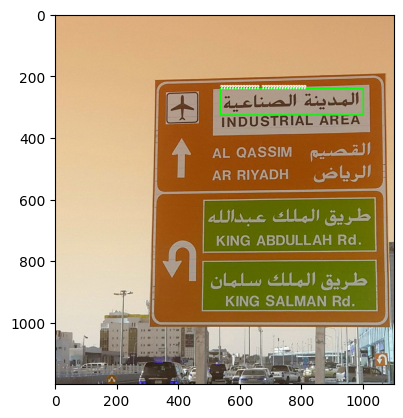

In [ ]:
# قراءة الصورة من المسار المحدد
img = cv2.imread(IMAGE_PATH)

# رسم مربع حول النص المعترف به باستخدام الإحداثيات واللون المحدد
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

# وضع النص المعترف به على الصورة باستخدام الخط واللون المحدد
img = cv2.putText(img, text, top_left, font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

# عرض الصورة مع النص المعترف به وصندوق الحدود
plt.imshow(img)
plt.show()

**Visualizing Multiple Text Recognitions with Bounding Boxes on the Image**

In [ ]:
# قراءة الصورة من المسار المحدد
img = cv2.imread(IMAGE_PATH)

# رسم مربعات الحدود والنصوص المعترف بها على الصورة
for detection in result:
    top_left = tuple(map(int, detection[0][0]))  # تحويل الإحداثيات إلى أعداد صحيحة لأركان المربع
    bottom_right = tuple(map(int, detection[0][2]))  # تحويل الإحداثيات إلى أعداد صحيحة لأركان المربع
    text = detection[1]  # النص المعترف به
    font = cv2.FONT_HERSHEY_SIMPLEX  # نمط الخط المستخدم

    # رسم مربع الحدود حول النص المعترف به
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

    # وضع النص المعترف به على الصورة بجوار المربع
    img = cv2.putText(img, text, (top_left[0], top_left[1] - 10), font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

# عرض الصورة النهائية باستخدام مكتبة Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


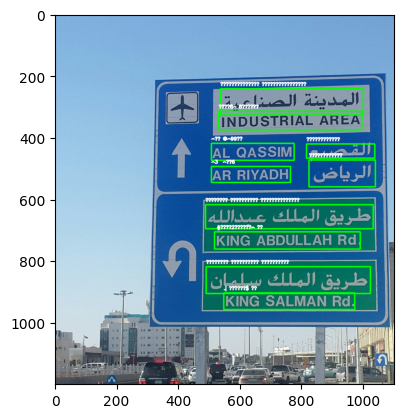

In [ ]:
result = reader.readtext(IMAGE_PATH)
# طباعة جميع الأسطر المكتشفة من النص
print("Detected Text:")
for detection in result:
    print(detection[1])

Detected Text:
المدينة الصناعية
٥ع8^ 8٥ح٥
^، @^99٥
^3  ^٥6
الرياض
طريق الملك عبدالله
 #٥٧2٥٥ق^ ش
طريق الملك سلمان
.| ٥س٥$ ش
القصيم


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
